In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [2]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [3]:
all_files = ["Data/34515489.csv"] # "Data/47.csv", "Data/48.csv" #run each of the three files one at a time


In [4]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
std_devs = {}

for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit
        

    df1 = get_frequencies(last_digits)
    
    column_data = {}
    keys = []
    

    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies

        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
        column_data[key] = frequencies['Percentage']
        keys.append(key)
 

    
    df5 = pd.DataFrame(column_data)
    #df5['Average'] = df1['freq'] / sum(df1['freq']) * 100
    print(df5)
    df5 = df5.drop([0])
    
    std_devs[file] = df5.std(axis = 1)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100
    print(df2)


1
         N60       N122       N186       N204       N288       N315       N406
0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
1  29.973475  32.066508  27.368421  25.000000  32.844575  29.885057  29.312977
2  16.843501  17.933492  16.842105  20.036765  14.369501  17.241379  18.167939
3  12.732095  11.282660  16.491228  13.970588  10.850440  13.505747  14.732824
4   8.488064   8.551069  11.578947  11.948529   9.970674   8.620690   9.923664
5   6.498674   5.700713   6.315789   7.536765  10.557185   4.597701   7.328244
6   7.692308   5.700713   4.912281   6.801471   6.451613   7.183908   5.190840
7   7.161804   6.769596   7.017544   6.801471   5.278592   5.459770   5.725191
8   5.702918   6.175772   4.561404   3.860294   4.985337   8.620690   5.572519
9   4.907162   5.819477   4.912281   4.044118   4.692082   4.885057   4.045802
   Data/34515489.csv
0           0.000000
1          29.611212
2          17.676311
3          13.358951
4           9.674503
5  

   level_0  Digit  percentage
0      N60      1   29.973475
1      N60      2   16.843501
2      N60      3   12.732095
3      N60      4    8.488064
4      N60      5    6.498674
..     ...    ...         ...
58    N406      5    7.328244
59    N406      6    5.190840
60    N406      7    5.725191
61    N406      8    5.572519
62    N406      9    4.045802

[63 rows x 3 columns]


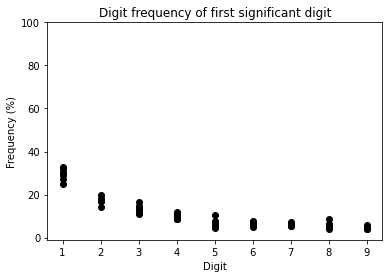

In [11]:
df6 = pd.DataFrame(df5).T.stack().reset_index()#.drop(columns=['level_1'])
df6 = df6.rename(columns={0: "percentage", "level_1": "Digit"})
print(df6)

plt.scatter(x = 'Digit', y = 'percentage', data = df6, color = 'black')
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 100)
plt.ylabel("Frequency (%)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
plt.savefig('Data/fig1a', dpi=300)
plt.show()

In [6]:
# df6 = df6.astype({'Digit': str})

# df6 = pd.pivot_table(df6, values = 'percentage', index = 'level_0', columns = 'Digit').reset_index()
# print(df6)

In [7]:
# plt.boxplot(df7, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 40)
# plt.ylabel("Standard Deviation")
# plt.xlabel("Digit")
# plt.title("Standard deviation of digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
# plt.show()

In [8]:
# PCA analysis of digit frequencies
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# features = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
# print(features)

# Separating out the features
# x = df6.loc[:, features].values
# # Separating out the target
# y = df6.loc[:,['level_0']].values
# # # Standardizing the features

# x = StandardScaler().fit_transform(x)
# print(x)

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, df6[['level_0']]], axis = 1)
# print(finalDf)

In [9]:
# a PCA plot of the digit frequencies
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('50', fontsize = 20)

# targets = keys
# for target in targets:
#    indicesToKeep = finalDf['level_0'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , s = 50)
# ax.legend(targets)
# ax.grid()